# 
# Loan Prediction
# 

## Problem 

A Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a data set.


## Data

- Variable Descriptions:


| Variable          	| Description                                    	|
|-------------------	|------------------------------------------------	|
| Loan_ID           	| Unique Loan ID                                 	|
| Gender            	| Male/ Female                                   	|
| Married           	| Applicant married (Y/N)                        	|
| Dependents        	| Number of dependents                           	|
| Education         	| Applicant Education (Graduate/ Under Graduate) 	|
| Self_Employed     	| Self employed (Y/N)                            	|
| ApplicantIncome   	| Applicant income                               	|
| CoapplicantIncome 	| Coapplicant income                             	|
| LoanAmount        	| Loan amount in thousands                       	|
| Loan_Amount_Term  	| Term of loan in months                         	|
| Credit_History    	| credit history meets guidelines                	|
| Property_Area     	| Urban/ Semi Urban/ Rural                       	|
| Loan_Status       	| Loan approved (Y/N)                            	|
| timespentonsite_7days | Time spent by customer in last 7 days on site     |
| pageviews_7days       | Page views by customer in last 7 days on site     |
| sessions_7days       	| #Sessions by customer in last 7 days on site      |


## Importing libraries

In [1]:
#Importing libraries
import os
import io
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import itertools
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt#visualization
import seaborn as sns#visualization

from PIL import  Image
%matplotlib inline

import plotly.offline as py#visualization
py.init_notebook_mode(connected=True)#visualization
import plotly.graph_objs as go#visualization
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization

import sklearn
import sklearn.metrics
from sklearn.linear_model import LogisticRegression
import pickle
#import scikitplot as skplt

#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, 
                             confusion_matrix, roc_auc_score, roc_curve, classification_report)

In [2]:
# No warnings about setting value on copy of slice
pd.options.mode.chained_assignment = None

# Display up to 60 columns of a dataframe
pd.set_option('display.max_columns', 60)

# Inline graphs
%matplotlib inline

# Set default font size
plt.rcParams['font.size'] = 24

# Internal ipython tool for setting figure size
from IPython.core.pylabtools import figsize

# Font size for seaborn
sns.set(font_scale = 2)

pd.options.display.float_format = '{:.2f}'.format

## Importing Data
# 

In [3]:
# Loading data into Dataframe
data = pd.read_csv('data.csv')

# Dimensions of dataset
# Rows and Columns in dataset
print ("Rows     : " ,data.shape[0])
print ("Columns  : " ,data.shape[1])

Rows     :  1390
Columns  :  17


In [4]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,isMobile,timespentonsite_7days,pageviews_7days,sessions_7days,Loan_Status
0,LP001002,Male,No,0,Graduate,No,58490,0.00,NaN,360.00,1.00,Urban,0,44,12,3,Y
1,LP001003,Male,Yes,1,Graduate,No,45830,15080.00,128000.00,360.00,1.00,Rural,0,33,6,4,N
2,LP001004,Male,Yes,0,Graduate,Yes,30000,0.00,66000.00,360.00,1.00,Urban,1,38,12,3,Y
3,LP001005,Male,Yes,0,Not Graduate,No,25830,23580.00,120000.00,360.00,1.00,Urban,0,25,19,4,Y
4,LP001006,Male,No,0,Graduate,No,60000,0.00,141000.00,360.00,1.00,Urban,0,28,13,6,Y


In [5]:
# Features of the dataset
print ("\nFeatures : \n" ,data.columns.tolist())

# Unique values in a column
print ("\nUnique values :  \n",data.nunique())


Features : 
 ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'isMobile', 'timespentonsite_7days', 'pageviews_7days', 'sessions_7days', 'Loan_Status']

Unique values :  
 Loan_ID                  1390
Gender                      2
Married                     2
Dependents                  4
Education                   2
Self_Employed               2
ApplicantIncome           505
CoapplicantIncome         287
LoanAmount                203
Loan_Amount_Term           10
Credit_History              2
Property_Area               3
isMobile                    2
timespentonsite_7days      41
pageviews_7days            18
sessions_7days              6
Loan_Status                 2
dtype: int64


In [6]:
# Information about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1390 entries, 0 to 1389
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Loan_ID                1390 non-null   object 
 1   Gender                 1362 non-null   object 
 2   Married                1387 non-null   object 
 3   Dependents             1357 non-null   object 
 4   Education              1390 non-null   object 
 5   Self_Employed          1331 non-null   object 
 6   ApplicantIncome        1390 non-null   int64  
 7   CoapplicantIncome      1390 non-null   float64
 8   LoanAmount             1320 non-null   float64
 9   Loan_Amount_Term       1355 non-null   float64
 10  Credit_History         1291 non-null   float64
 11  Property_Area          1390 non-null   object 
 12  isMobile               1390 non-null   int64  
 13  timespentonsite_7days  1390 non-null   int64  
 14  pageviews_7days        1390 non-null   int64  
 15  sess

In [7]:
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area','Credit_History','Loan_Amount_Term','isMobile']
#categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area','Loan_Amount_Term']

print(categorical_columns)
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','timespentonsite_7days','pageviews_7days','sessions_7days']
print(numerical_columns)

['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Credit_History', 'Loan_Amount_Term', 'isMobile']
['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'timespentonsite_7days', 'pageviews_7days', 'sessions_7days']


## Event Rate

In [8]:
data.groupby('Loan_Status').size()

Loan_Status
N    968
Y    422
dtype: int64

In [9]:
print(data.groupby('Loan_Status').size()/data.shape[0])
data.reset_index(drop=True, inplace=True)

Loan_Status
N   0.70
Y   0.30
dtype: float64


<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

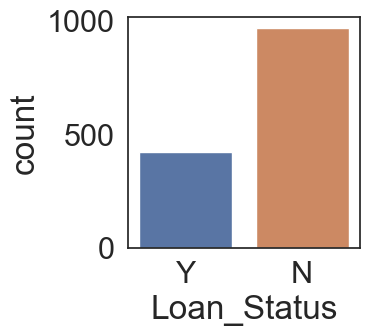

In [10]:
fig = plt.figure(figsize=(3,3))
plt.style.use('seaborn-ticks')
sns.countplot(x="Loan_Status", data=data)

In [11]:
# Credit History and Loan Status
pd.crosstab(data['Credit_History'], data['Loan_Status'], margins=True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,416,7,423
1.0,490,378,868
All,906,385,1291


## Data Cleaning & Missing Value Treatment
# 

In [12]:
'''

Steps involved (contd.):
check if missing values present , and need to do missing value treatment

'''

# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

#Calling function on dataset    
missing_values_table(data)

Your selected dataframe has 17 columns.
There are 7 columns that have missing values.


,Missing Values,% of Total Values
Credit_History,99,7.10
LoanAmount,70,5.00
Self_Employed,59,4.20
Loan_Amount_Term,35,2.50
Dependents,33,2.40
Gender,28,2.00
Married,3,0.20


In [13]:
# Data Cleaning & Manipulation

'''
Steps involved:

1. replace with 'nan'
2. convert data to correct data types (here, float)
3. no need to change the target variable name 
'''

#Imputing Missing values with mean for continuous variable
data['LoanAmount'].fillna(data['LoanAmount'].mean(), inplace=True)
#fullData['LoanAmount_log'].fillna(fullData['LoanAmount_log'].mean(), inplace=True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mean(), inplace=True)
data['ApplicantIncome'].fillna(data['ApplicantIncome'].mean(), inplace=True)
data['CoapplicantIncome'].fillna(data['CoapplicantIncome'].mean(), inplace=True)

#Imputing Missing values with mode for categorical variables
data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)
data['Married'].fillna(data['Married'].mode()[0], inplace=True)
data['Dependents'].fillna(data['Dependents'].mode()[0], inplace=True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0], inplace=True)
data['Credit_History'].fillna(data['Credit_History'].mode()[0], inplace=True)
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0],inplace=True)

In [14]:
#Dropping null values from total charges column which contain .2% missing data 
#data = data[data["Income"].notnull()]
#data = data.reset_index()[data.columns]

In [15]:
missing_values_table(data)

Your selected dataframe has 17 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


<AxesSubplot:>

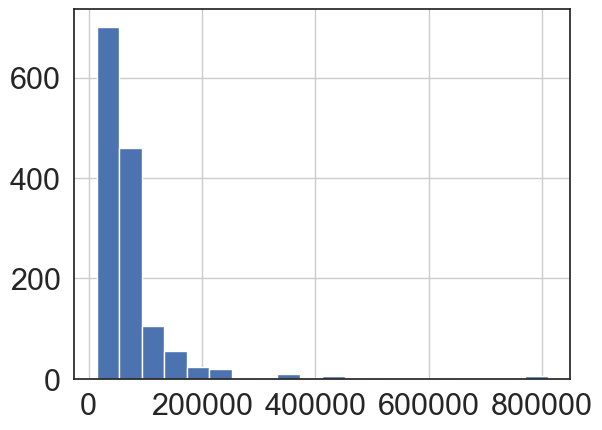

In [16]:
# Add both ApplicantIncome and CoapplicantIncome to TotalIncome
data['TotalIncome'] = data['ApplicantIncome'] + data['CoapplicantIncome']

#Histogram for Total Income
data['TotalIncome'].hist(bins=20) 

<AxesSubplot:>

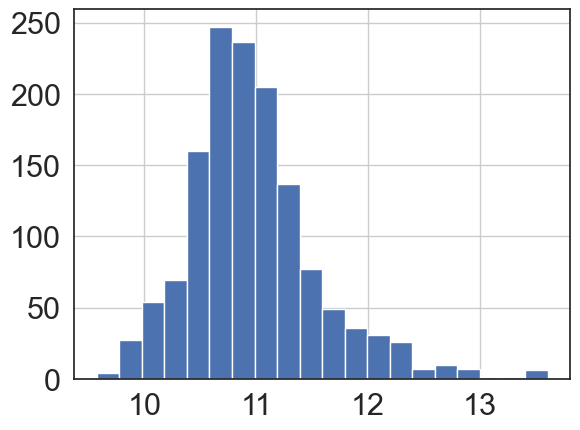

In [17]:
data['TotalIncome_log'] = np.log(data['TotalIncome'])

#Histogram for Total Income
data['TotalIncome_log'].hist(bins=20) 

<AxesSubplot:>

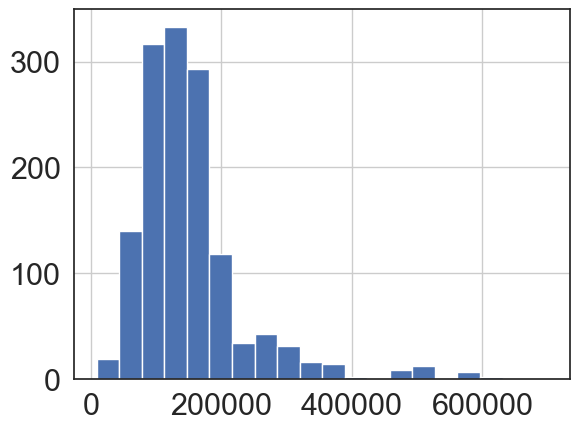

In [18]:
# Looking at the distribtion of TotalIncome
data['LoanAmount'].hist(bins=20)

<AxesSubplot:>

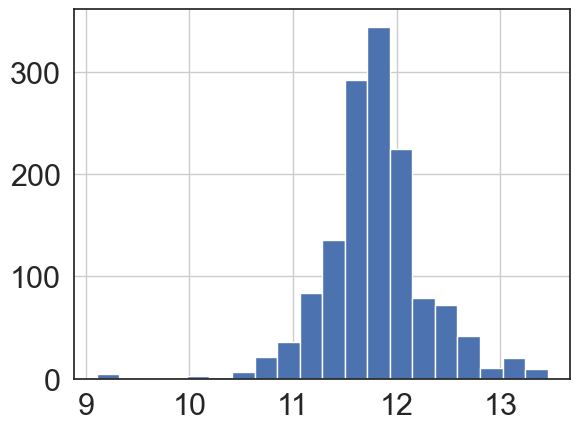

In [19]:
# Perform log transformation of LoanAmount to make it closer to normal
data['LoanAmount_log'] = np.log(data['LoanAmount'])

# Looking at the distribtion of LoanAmount_log
data['LoanAmount_log'].hist(bins=20)

<AxesSubplot:>

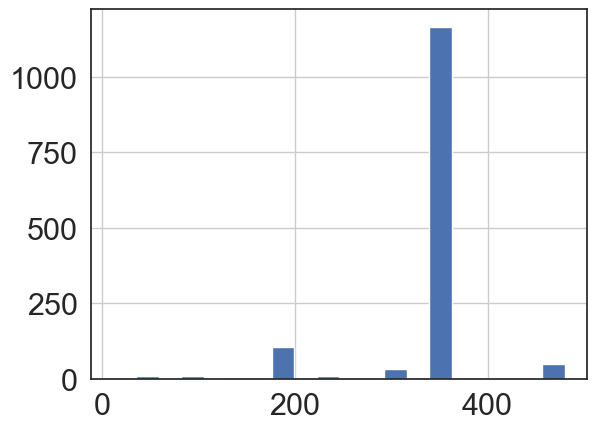

In [20]:
# Looking at the distribtion of LoanAmount term
data['Loan_Amount_Term'].hist(bins=20)

<AxesSubplot:>

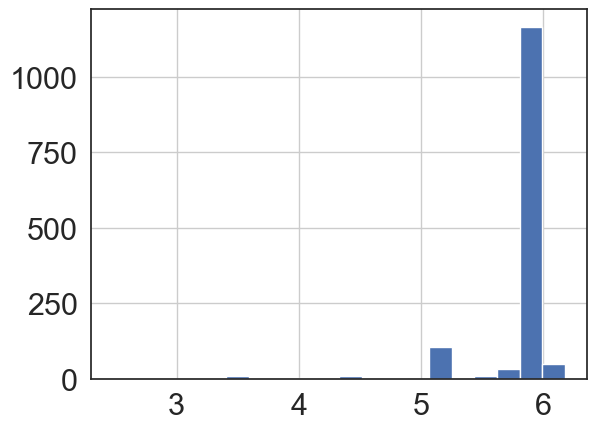

In [21]:
# Perform log transformation of Loan_Amount_Term to make it closer to normal
data['Loan_Amount_Term_log'] = np.log(data['Loan_Amount_Term'])

# Looking at the distribtion of Loan_Amount_Term_log
data['Loan_Amount_Term_log'].hist(bins=20)

# 
## Exploratory Data Analysis


## Univariate Analysis - Numeric Variables
# 

In [22]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,1390.00,55002.05,68229.63,1500.00,28735.00,38395.00,58205.00,810000.00
CoapplicantIncome,1390.00,17698.24,36793.79,0.00,0.00,11055.00,23330.00,416670.00
LoanAmount,1390.00,150156.82,84880.49,9000.00,103000.00,132000.00,172000.00,700000.00
Loan_Amount_Term,1390.00,342.37,66.88,12.00,360.00,360.00,360.00,480.00
Credit_History,1390.00,0.70,0.46,0.00,0.00,1.00,1.00,1.00
isMobile,1390.00,0.47,0.50,0.00,0.00,0.00,1.00,1.00
timespentonsite_7days,1390.00,29.38,10.68,10.00,21.00,30.00,39.00,50.00
pageviews_7days,1390.00,10.97,4.64,3.00,7.00,11.00,15.00,20.00
sessions_7days,1390.00,4.43,1.50,2.00,3.00,5.00,6.00,7.00
TotalIncome,1390.00,72700.29,74246.15,14420.00,41660.00,54070.00,75480.00,810000.00


In [23]:
data.median()

ApplicantIncome          38395.00
CoapplicantIncome        11055.00
LoanAmount              132000.00
Loan_Amount_Term           360.00
Credit_History               1.00
isMobile                     0.00
timespentonsite_7days       30.00
pageviews_7days             11.00
sessions_7days               5.00
TotalIncome              54070.00
TotalIncome_log             10.90
LoanAmount_log              11.79
Loan_Amount_Term_log         5.89
dtype: float64

In [24]:
# Generate Descriptive Statistics for Continuous variables
data.describe(percentiles=np.linspace(0,1,11)).T

,count,mean,std,min,0%,10%,20%,30%,40%,50%,60%,70%,80%,90%,100%,max
ApplicantIncome,1390.00,55002.05,68229.63,1500.00,1500.00,21780.00,26090.00,30360.00,34180.00,38395.00,44364.00,51366.00,62782.00,95743.00,810000.00,810000.00
CoapplicantIncome,1390.00,17698.24,36793.79,0.00,0.00,0.00,0.00,0.00,0.00,11055.00,16670.00,20830.00,25830.00,38916.00,416670.00,416670.00
LoanAmount,1390.00,150156.82,84880.49,9000.00,9000.00,72900.00,96000.00,110000.00,120000.00,132000.00,150062.73,160000.00,184200.00,244000.00,700000.00,700000.00
Loan_Amount_Term,1390.00,342.37,66.88,12.00,12.00,240.00,360.00,360.00,360.00,360.00,360.00,360.00,360.00,360.00,480.00,480.00
Credit_History,1390.00,0.70,0.46,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
isMobile,1390.00,0.47,0.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00
timespentonsite_7days,1390.00,29.38,10.68,10.00,10.00,14.00,19.00,22.00,26.00,30.00,33.00,37.00,41.00,44.00,50.00,50.00
pageviews_7days,1390.00,10.97,4.64,3.00,3.00,5.00,6.00,8.00,10.00,11.00,13.00,14.00,15.00,17.00,20.00,20.00
sessions_7days,1390.00,4.43,1.50,2.00,2.00,2.00,3.00,4.00,4.00,5.00,5.00,5.00,6.00,6.00,7.00,7.00
TotalIncome,1390.00,72700.29,74246.15,14420.00,14420.00,31580.00,37500.00,44845.00,47870.00,54070.00,60910.00,68373.00,85000.00,117717.00,810000.00,810000.00


# 
## Univariate Analysis - Categorical Variables
# 

In [25]:
# Generate descriptive statistics for categorical variables
data.describe(include = "O").T

,count,unique,top,freq
Loan_ID,1390,1390,LP001002,1
Gender,1390,2,Male,1136
Married,1390,2,Yes,893
Dependents,1390,4,0,795
Education,1390,2,Graduate,1040
Self_Employed,1390,2,No,1200
Property_Area,1390,3,Urban,477
Loan_Status,1390,2,N,968


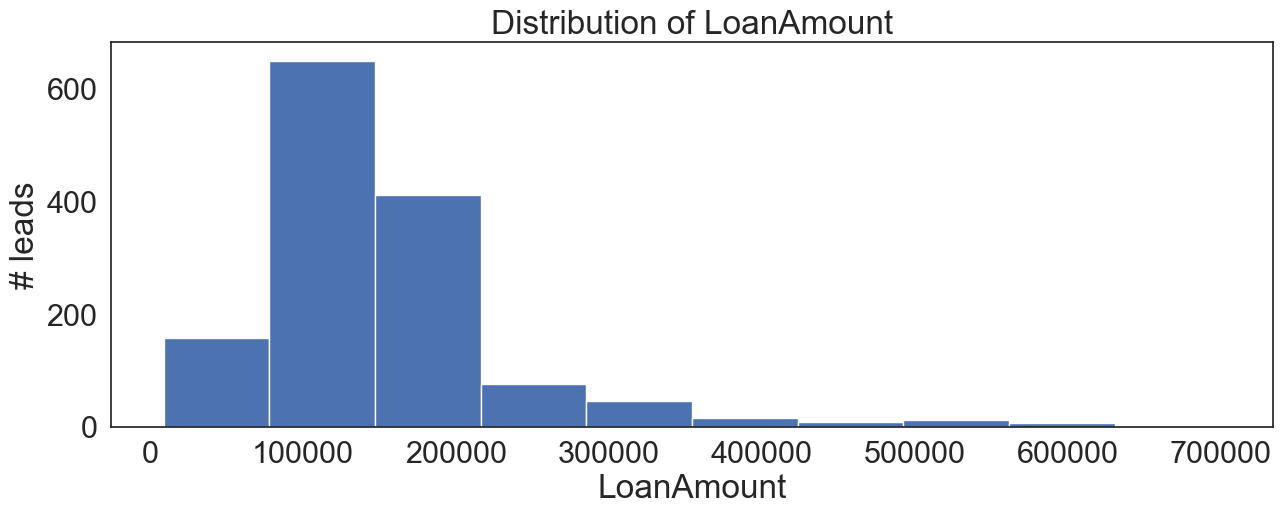

In [26]:
data['LoanAmount'].plot(kind='hist',
                            bins=10,
                            figsize=(15, 5),
                           title='Distribution of LoanAmount')
plt.xlabel('LoanAmount');
plt.ylabel('# leads');
plt.show()

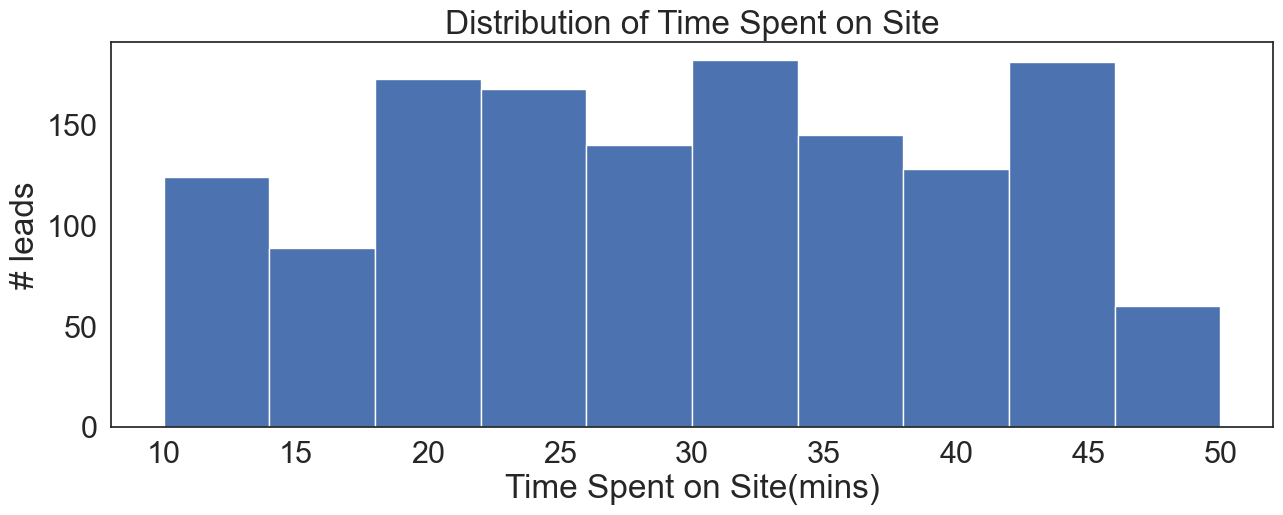

In [27]:
data['timespentonsite_7days'].plot(kind='hist',
                            bins=10,
                            figsize=(15, 5),
                           title='Distribution of Time Spent on Site')
plt.xlabel('Time Spent on Site(mins)');
plt.ylabel('# leads');
plt.show()

<AxesSubplot:xlabel='timespentonsite_7days'>

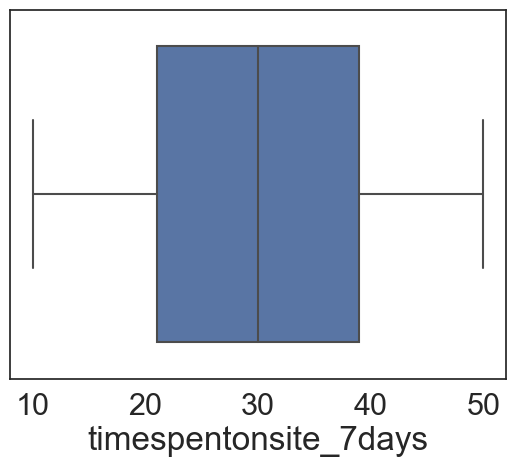

In [28]:
sns.boxplot(data['timespentonsite_7days'])   

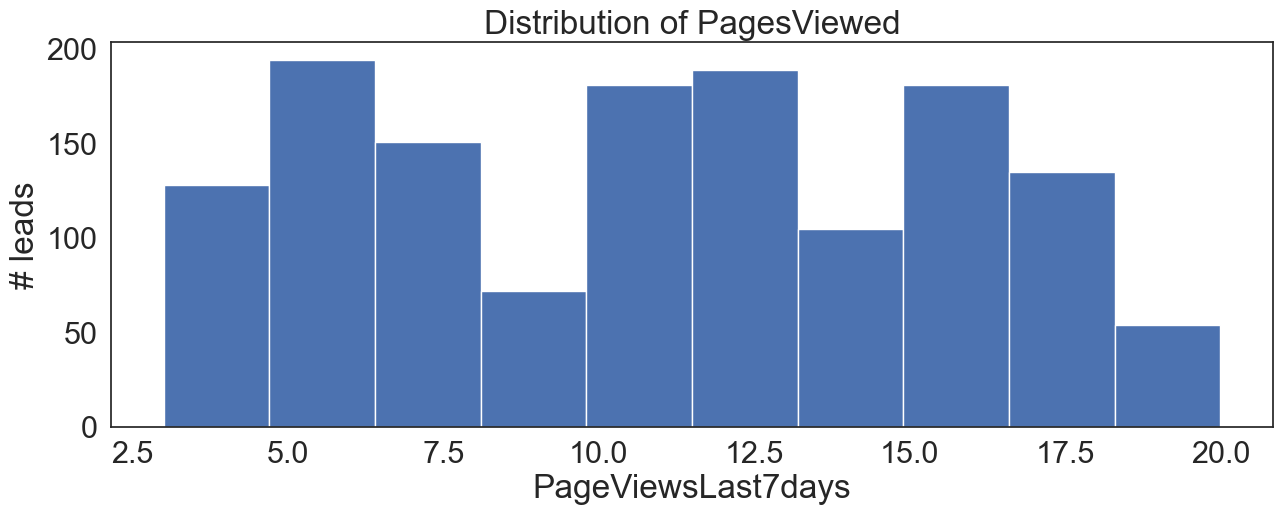

In [29]:
data['pageviews_7days'].plot(kind='hist',
                            bins=10,
                            figsize=(15, 5),
                           title='Distribution of PagesViewed')
plt.xlabel('PageViewsLast7days');
plt.ylabel('# leads');
plt.show()

<AxesSubplot:xlabel='pageviews_7days'>

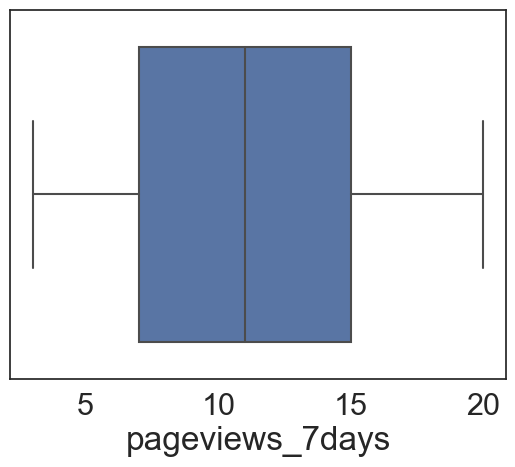

In [30]:
sns.boxplot(data['pageviews_7days'])   

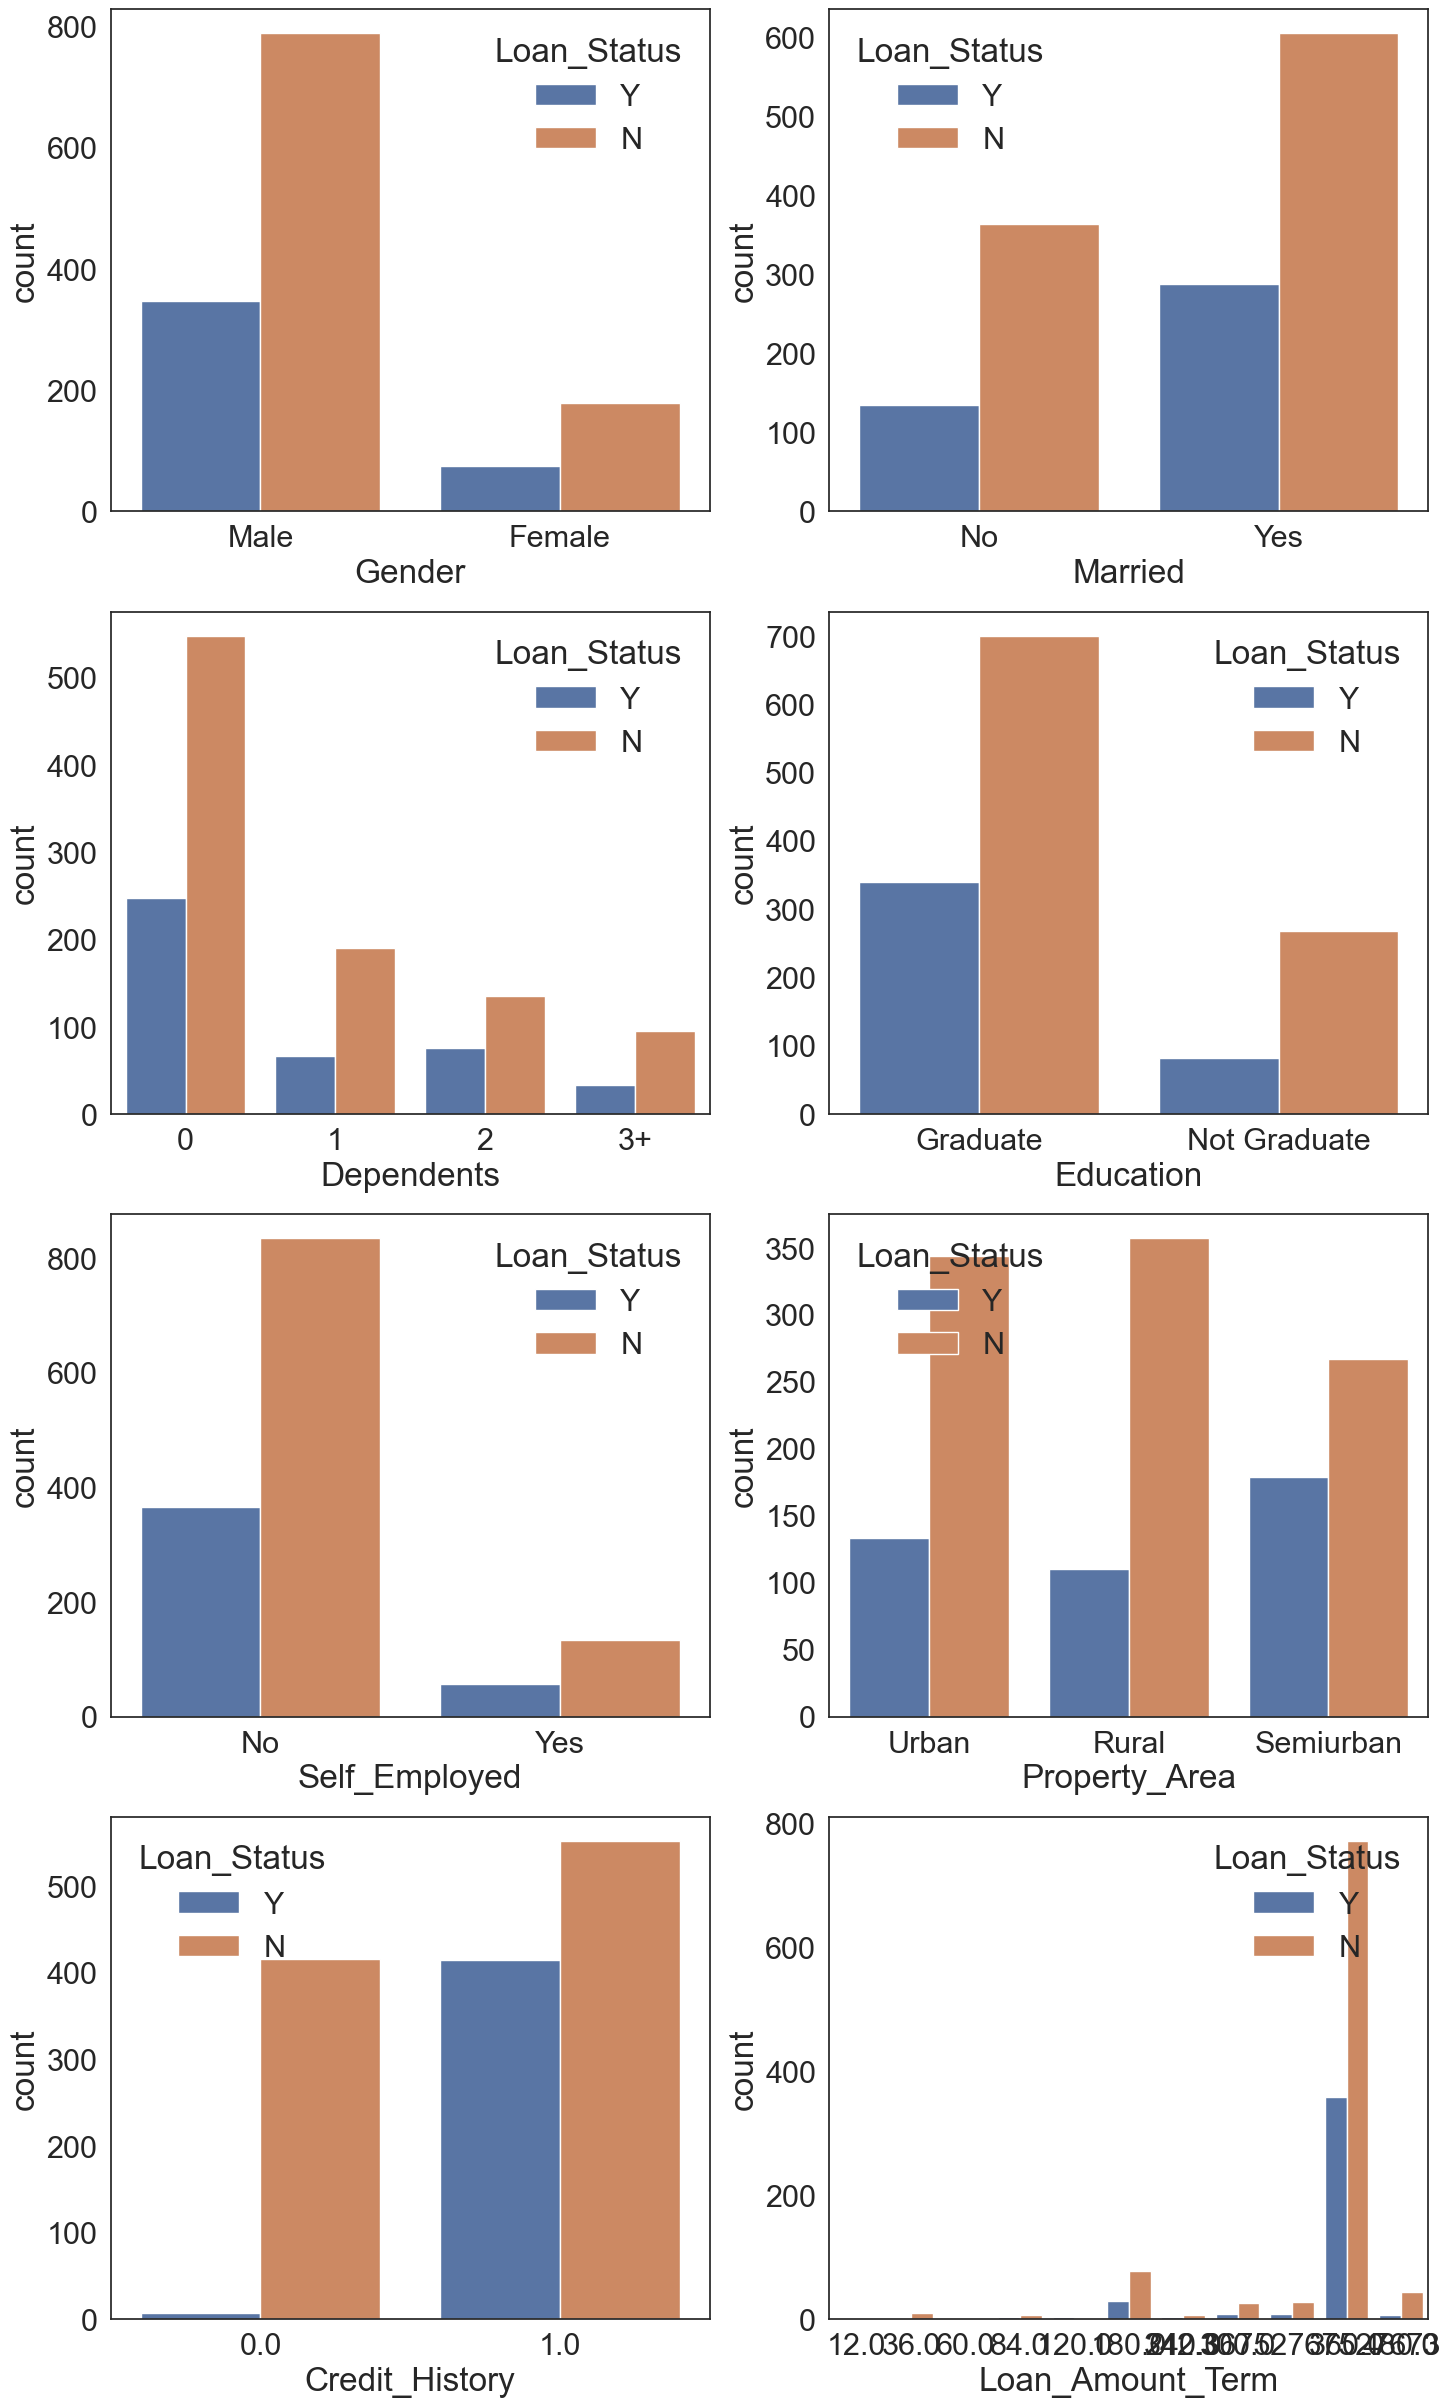

In [31]:
### Data Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt


fig,axes = plt.subplots(4,2,figsize=(17,30))
try:
    for idx,cat_col in enumerate(categorical_columns):
        row,col = idx//2,idx%2
        sns.countplot(x=cat_col,data=data,hue='Loan_Status',ax=axes[row,col])
    plt.subplots_adjust(hspace=1)
    plt.subplots_adjust(vspace=4)    
except:
    pass


       ApplicantIncome  CoapplicantIncome  LoanAmount  timespentonsite_7days  \
count          1390.00            1390.00     1390.00                1390.00   
mean          55002.05           17698.24   150156.82                  29.38   
std           68229.63           36793.79    84880.49                  10.68   
min            1500.00               0.00     9000.00                  10.00   
25%           28735.00               0.00   103000.00                  21.00   
50%           38395.00           11055.00   132000.00                  30.00   
75%           58205.00           23330.00   172000.00                  39.00   
max          810000.00          416670.00   700000.00                  50.00   

       pageviews_7days  sessions_7days  
count          1390.00         1390.00  
mean             10.97            4.43  
std               4.64            1.50  
min               3.00            2.00  
25%               7.00            3.00  
50%              11.00           

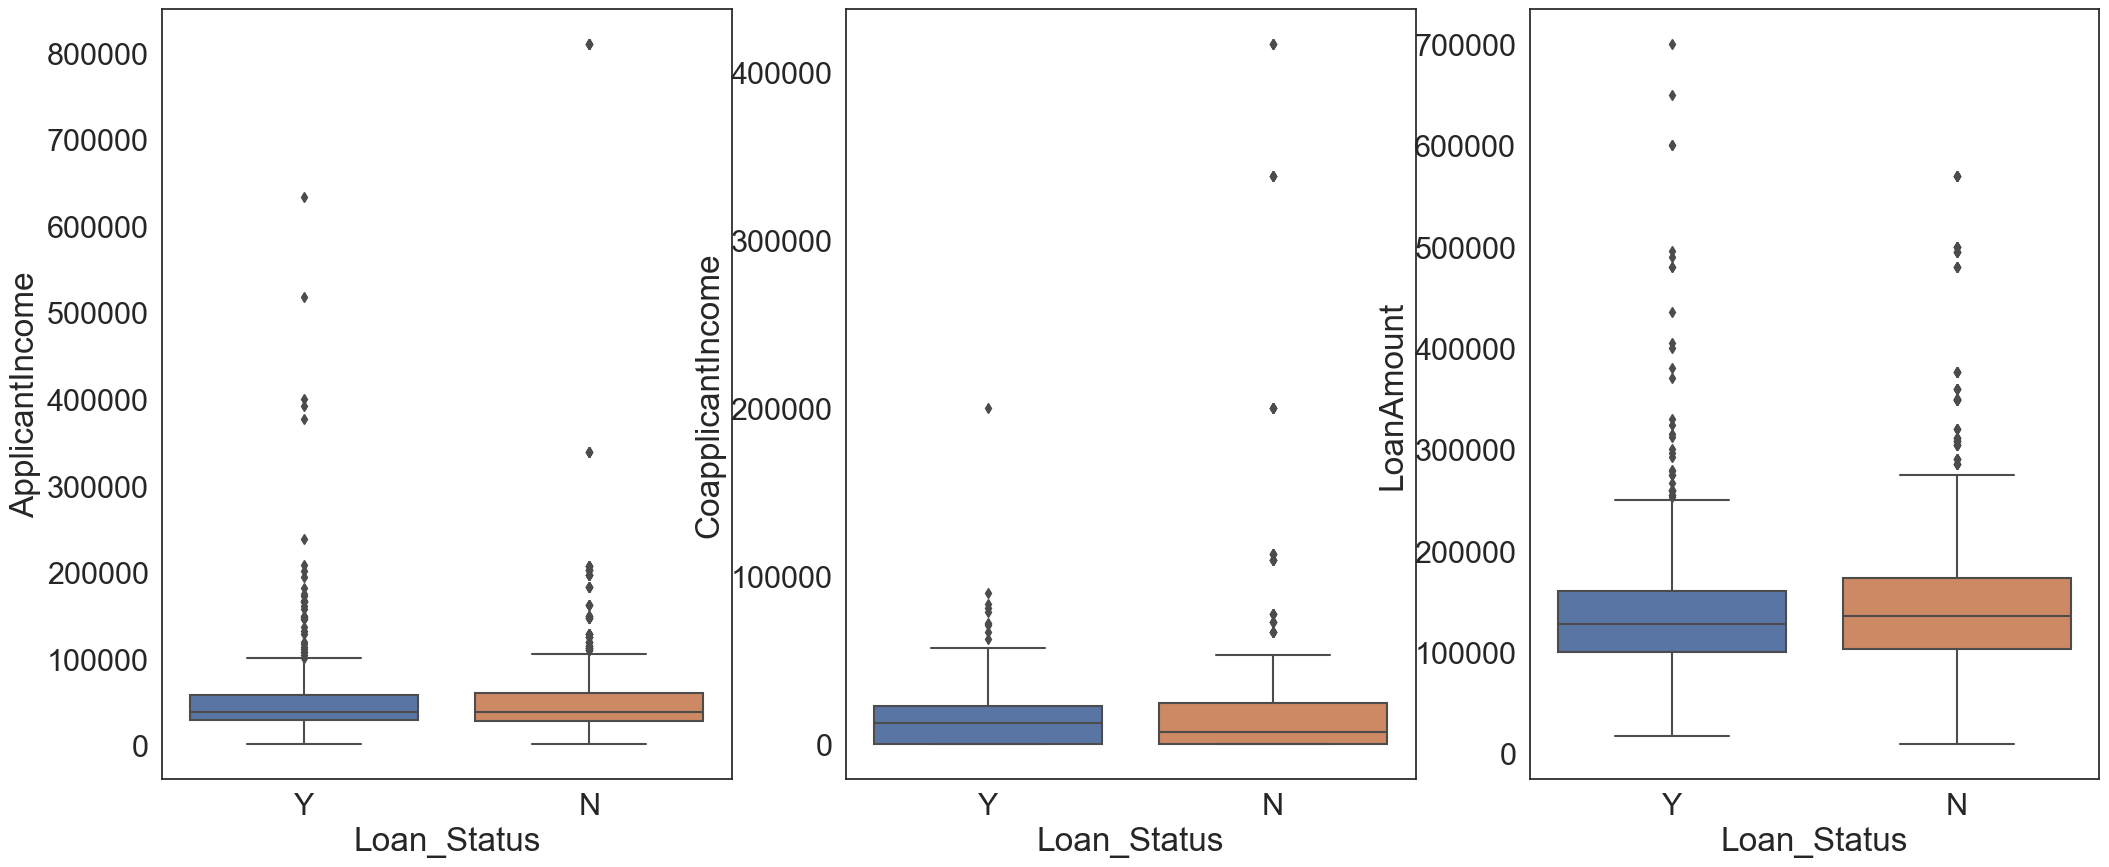

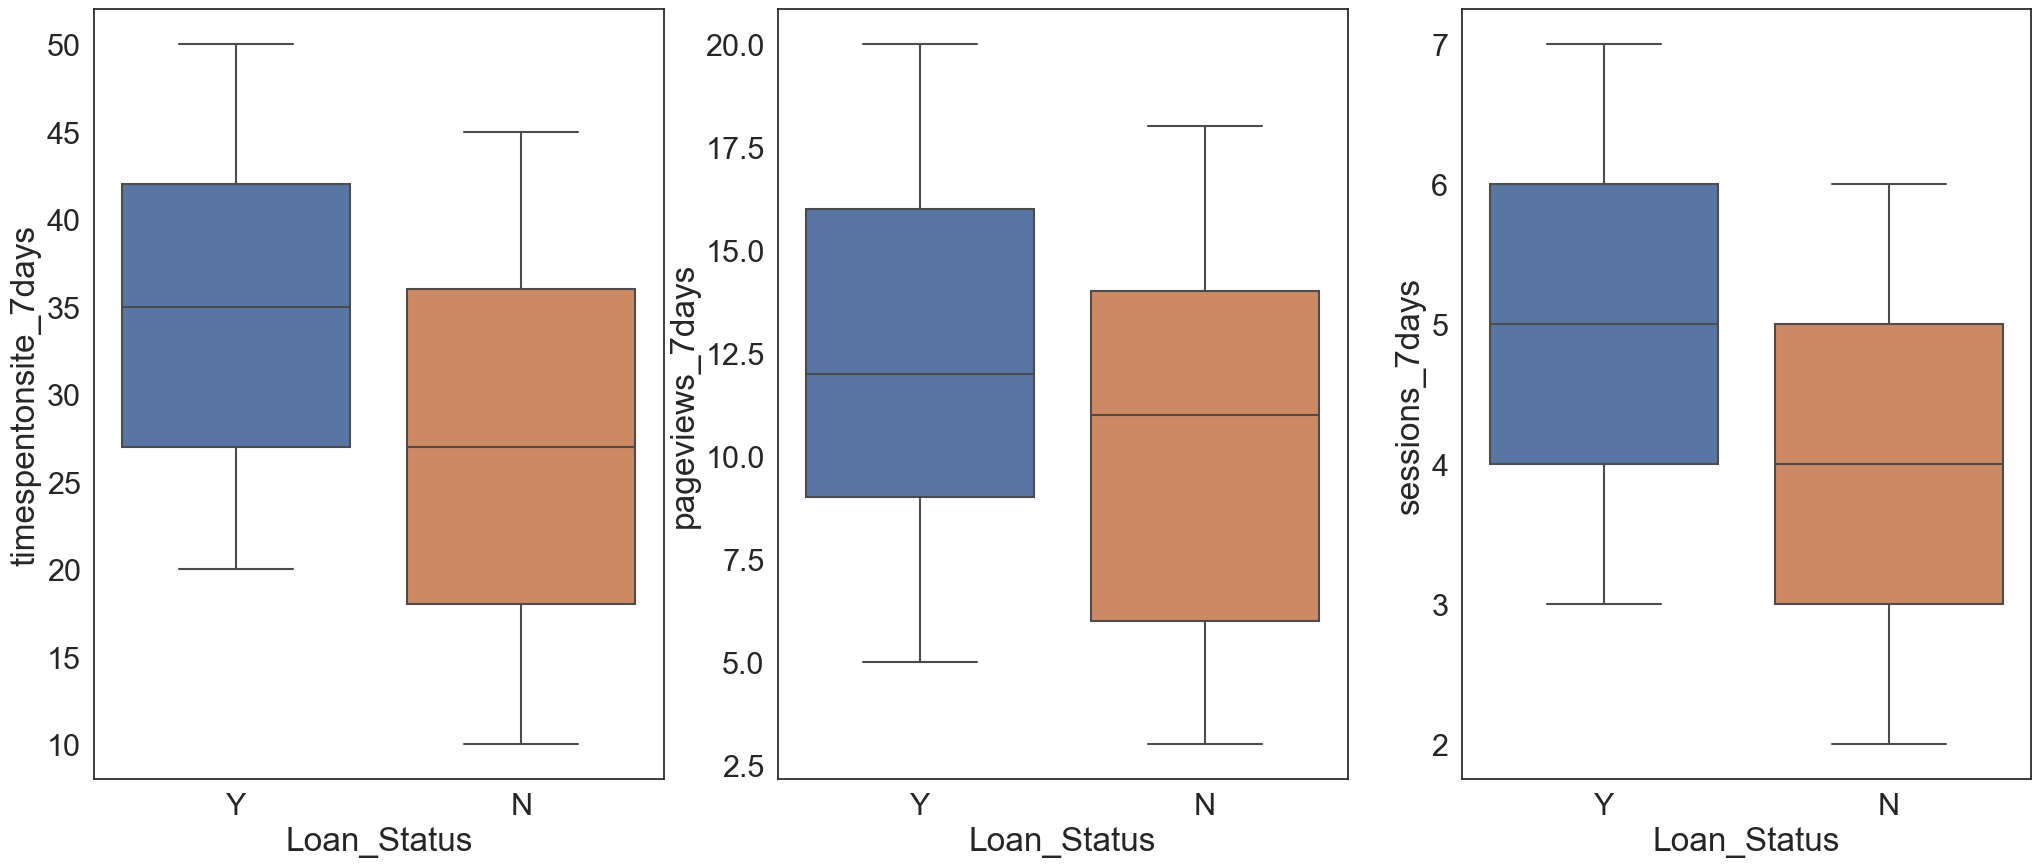

In [32]:
fig,axes = plt.subplots(1,3,figsize=(25,10))
try:
    for idx,cat_col in enumerate(numerical_columns):
        sns.boxplot(y=cat_col,data=data,x='Loan_Status',ax=axes[idx])
except:
    pass

plt.subplots_adjust(hspace=1)
print(data[numerical_columns].describe())

fig,axes = plt.subplots(1,3,figsize=(25,10))
try:
    for idx,cat_col in enumerate(numerical_columns[3:]):
        sns.boxplot(y=cat_col,data=data,x='Loan_Status',ax=axes[idx])
except:
    pass

plt.subplots_adjust(hspace=1)

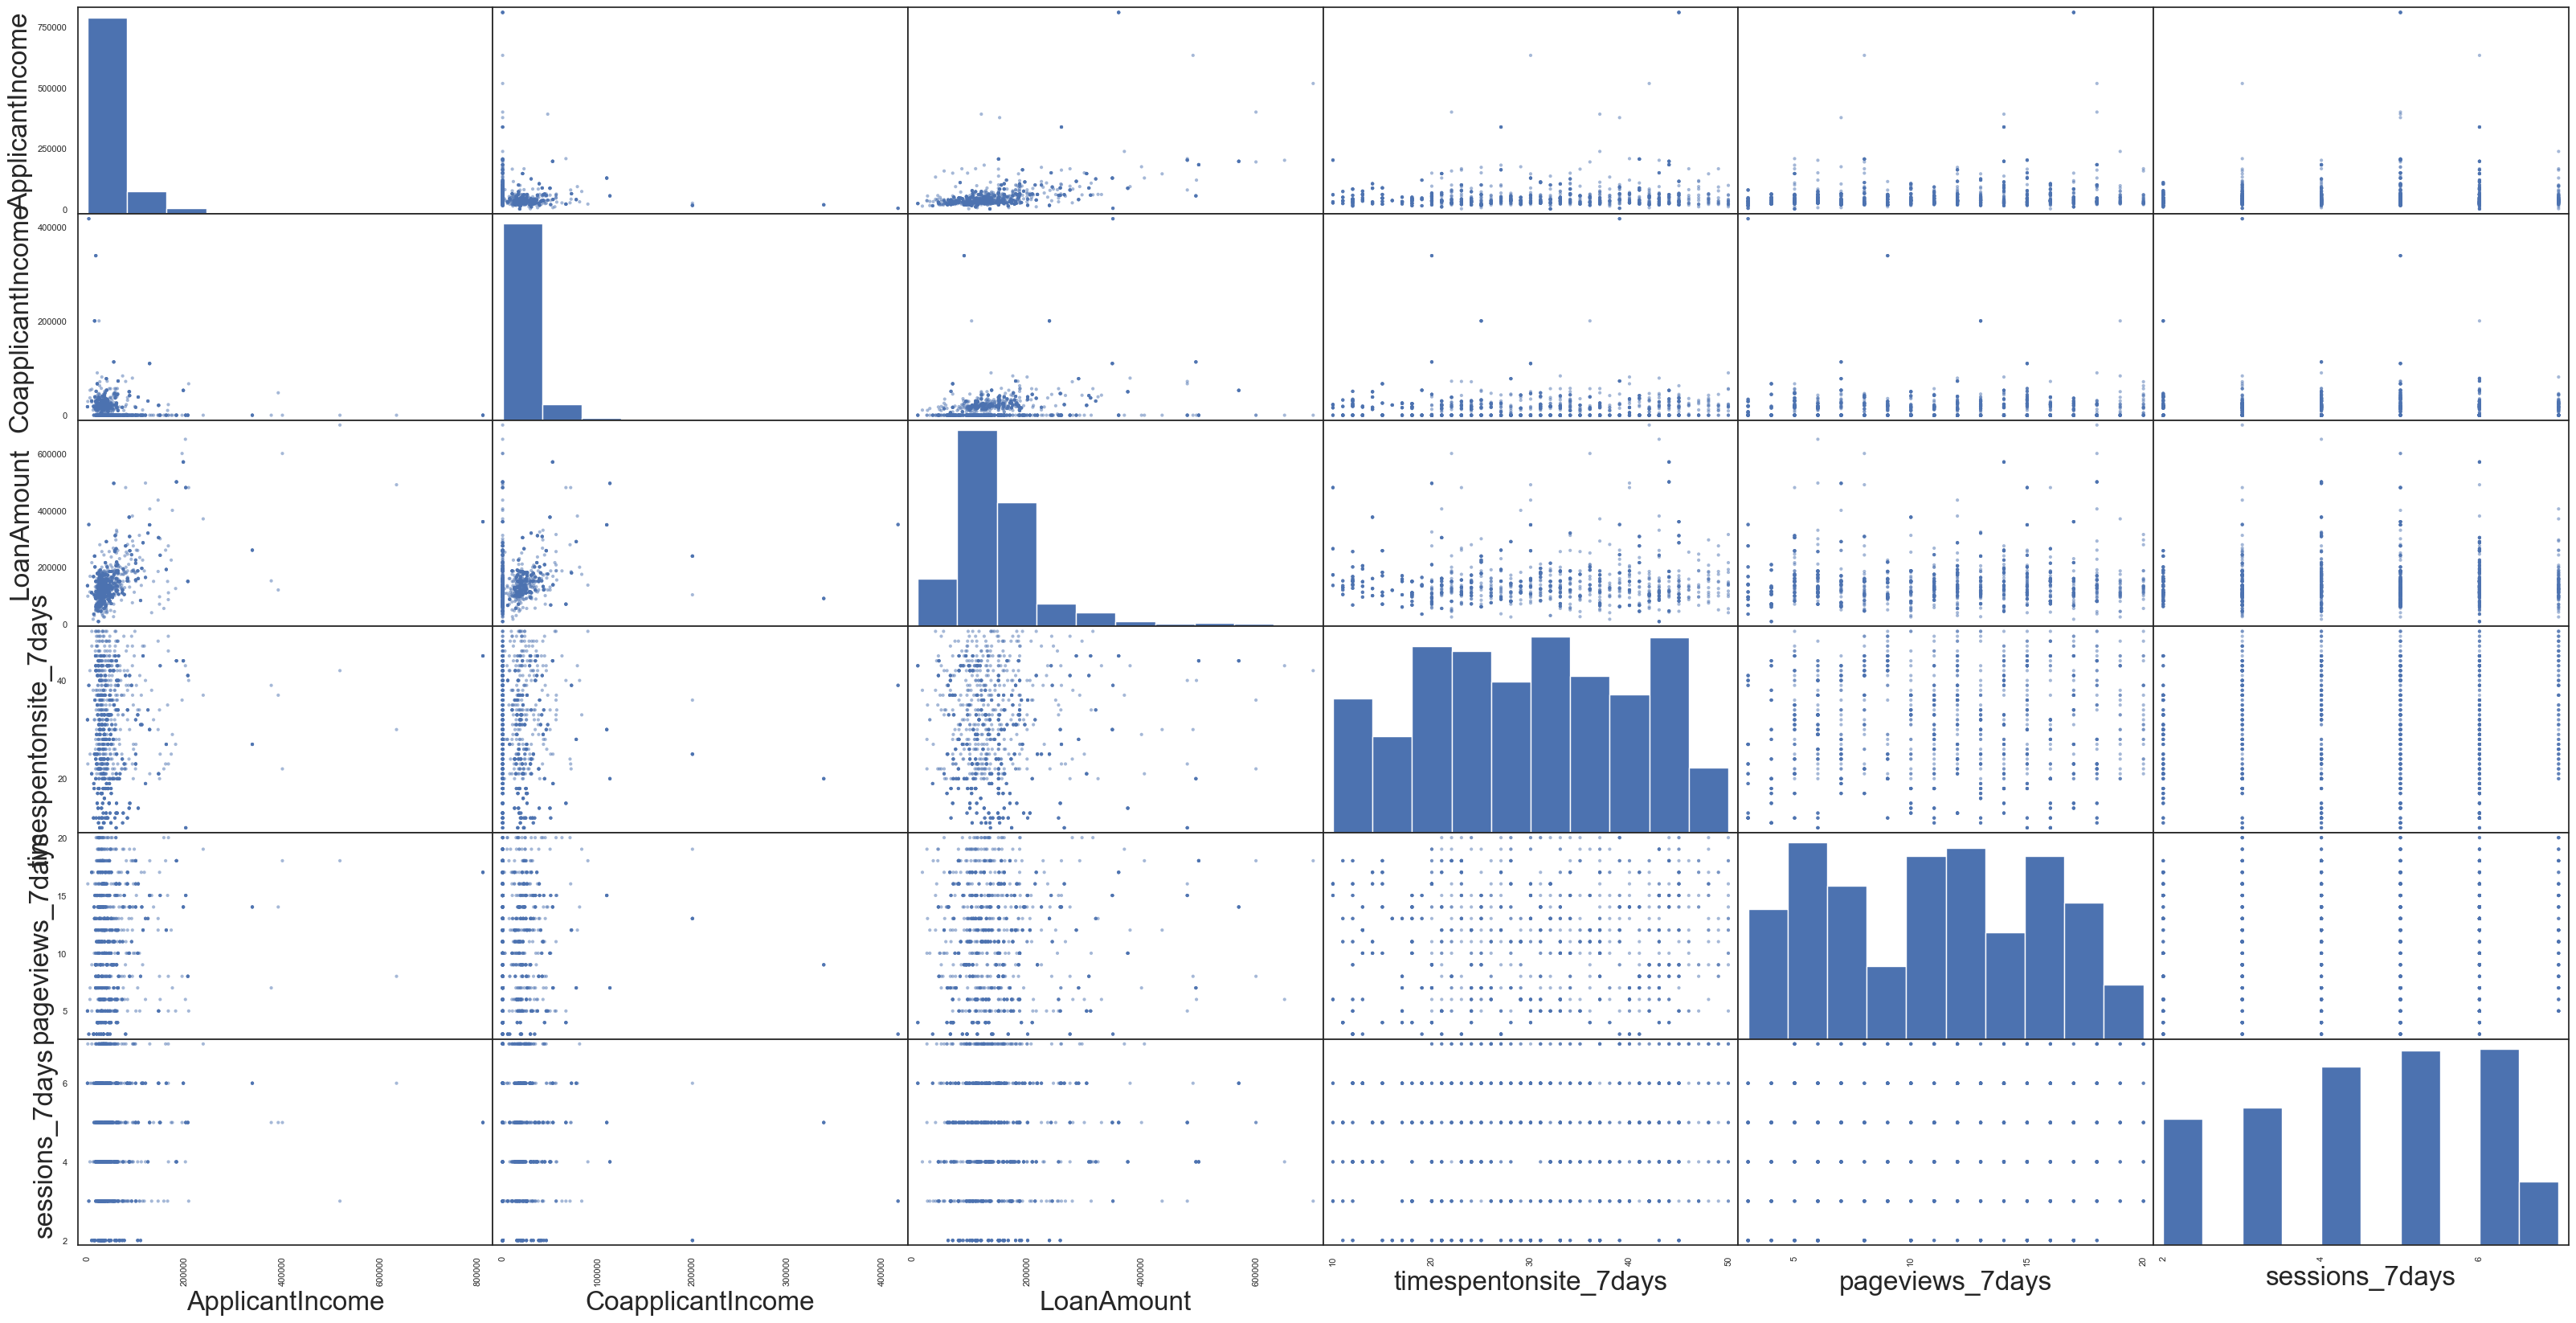

In [33]:
pd.plotting.scatter_matrix(data[numerical_columns], figsize = (40, 20))
plt.show()

# 
## Correlation Analysis
# 

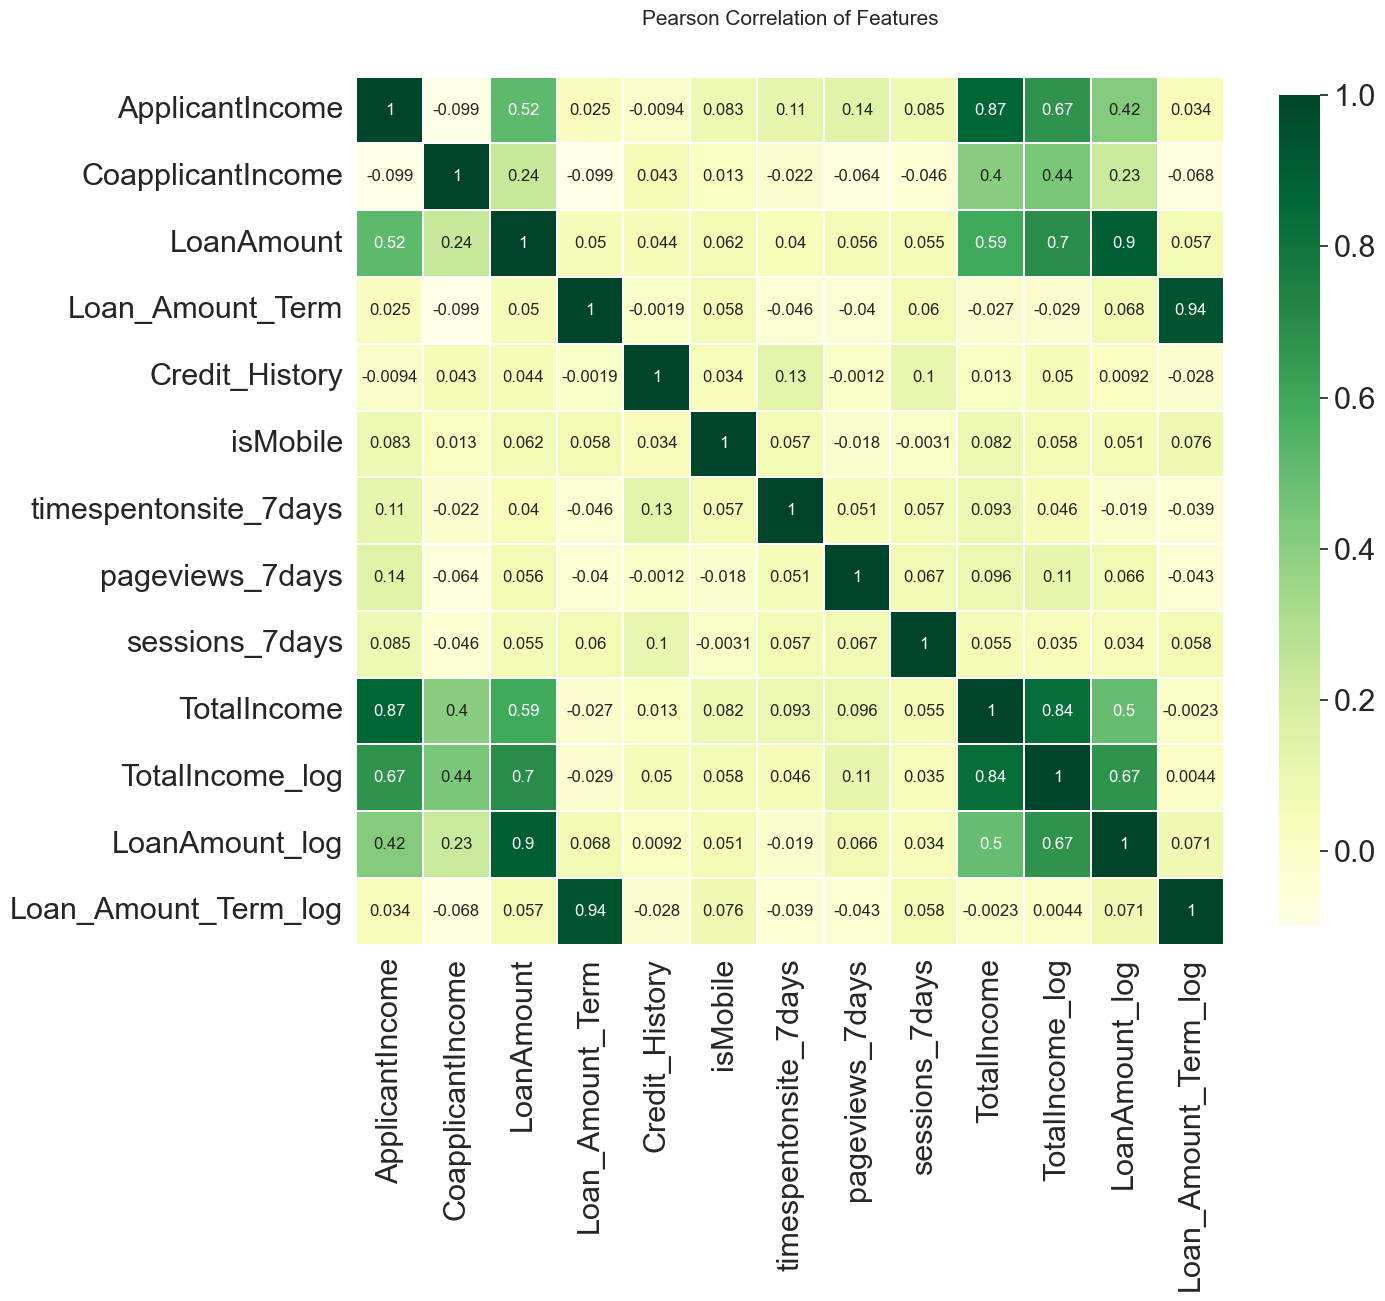

In [34]:
#correlation heatmap of dataset
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = "YlGn",
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(data)

# Feature Engineering
# 

In [35]:
#Applying One-hot Encoding for multi value columns
#data = pd.get_dummies(data = data,columns = multi_cols, drop_first=True)
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,isMobile,timespentonsite_7days,pageviews_7days,sessions_7days,Loan_Status,TotalIncome,TotalIncome_log,LoanAmount_log,Loan_Amount_Term_log
0,LP001002,Male,No,0,Graduate,No,58490,0.00,150156.82,360.00,1.00,Urban,0,44,12,3,Y,58490.00,10.98,11.92,5.89
1,LP001003,Male,Yes,1,Graduate,No,45830,15080.00,128000.00,360.00,1.00,Rural,0,33,6,4,N,60910.00,11.02,11.76,5.89
2,LP001004,Male,Yes,0,Graduate,Yes,30000,0.00,66000.00,360.00,1.00,Urban,1,38,12,3,Y,30000.00,10.31,11.10,5.89
3,LP001005,Male,Yes,0,Not Graduate,No,25830,23580.00,120000.00,360.00,1.00,Urban,0,25,19,4,Y,49410.00,10.81,11.70,5.89
4,LP001006,Male,No,0,Graduate,No,60000,0.00,141000.00,360.00,1.00,Urban,0,28,13,6,Y,60000.00,11.00,11.86,5.89


In [36]:
#### Encoding categrical Features: ##########
data.drop(columns=['Loan_ID','TotalIncome','LoanAmount','ApplicantIncome','CoapplicantIncome','Loan_Amount_Term'],inplace=True)
data_encoded = pd.get_dummies(data,drop_first=True)
data_encoded.head()

,Credit_History,isMobile,timespentonsite_7days,pageviews_7days,sessions_7days,TotalIncome_log,LoanAmount_log,Loan_Amount_Term_log,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,1.00,0,44,12,3,10.98,11.92,5.89,1,0,0,0,0,0,0,0,1,1
1,1.00,0,33,6,4,11.02,11.76,5.89,1,1,1,0,0,0,0,0,0,0
2,1.00,1,38,12,3,10.31,11.10,5.89,1,1,0,0,0,0,1,0,1,1
3,1.00,0,25,19,4,10.81,11.70,5.89,1,1,0,0,0,1,0,0,1,1
4,1.00,0,28,13,6,11.00,11.86,5.89,1,0,0,0,0,0,0,0,1,1


In [37]:
data_encoded

,Credit_History,isMobile,timespentonsite_7days,pageviews_7days,sessions_7days,TotalIncome_log,LoanAmount_log,Loan_Amount_Term_log,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,1.00,0,44,12,3,10.98,11.92,5.89,1,0,0,0,0,0,0,0,1,1
1,1.00,0,33,6,4,11.02,11.76,5.89,1,1,1,0,0,0,0,0,0,0
2,1.00,1,38,12,3,10.31,11.10,5.89,1,1,0,0,0,0,1,0,1,1
3,1.00,0,25,19,4,10.81,11.70,5.89,1,1,0,0,0,1,0,0,1,1
4,1.00,0,28,13,6,11.00,11.86,5.89,1,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1385,1.00,0,22,8,2,11.03,11.92,5.19,1,1,0,0,0,1,0,0,1,0
1386,1.00,0,33,6,4,11.02,11.76,5.89,1,1,1,0,0,0,0,0,0,0
1387,0.00,0,17,8,2,10.92,11.97,5.89,1,1,0,0,1,0,0,1,0,0
1388,1.00,1,30,15,5,12.38,12.76,5.89,1,1,1,0,0,0,0,1,0,0


## Selecting features & label
## 

In [38]:
# Separate the dataset into features and labels
train_x = data_encoded.iloc[:, 0:-1]  # features starts from 4th variable
train_y = data_encoded.iloc[:,-1]  #3rd variable is label (variable index starts from 0)

train_x

,Credit_History,isMobile,timespentonsite_7days,pageviews_7days,sessions_7days,TotalIncome_log,LoanAmount_log,Loan_Amount_Term_log,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,1.00,0,44,12,3,10.98,11.92,5.89,1,0,0,0,0,0,0,0,1
1,1.00,0,33,6,4,11.02,11.76,5.89,1,1,1,0,0,0,0,0,0
2,1.00,1,38,12,3,10.31,11.10,5.89,1,1,0,0,0,0,1,0,1
3,1.00,0,25,19,4,10.81,11.70,5.89,1,1,0,0,0,1,0,0,1
4,1.00,0,28,13,6,11.00,11.86,5.89,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1385,1.00,0,22,8,2,11.03,11.92,5.19,1,1,0,0,0,1,0,0,1
1386,1.00,0,33,6,4,11.02,11.76,5.89,1,1,1,0,0,0,0,0,0
1387,0.00,0,17,8,2,10.92,11.97,5.89,1,1,0,0,1,0,0,1,0
1388,1.00,1,30,15,5,12.38,12.76,5.89,1,1,1,0,0,0,0,1,0


In [39]:
train_y 

0       1
1       0
2       1
3       1
4       1
       ..
1385    0
1386    0
1387    0
1388    0
1389    0
Name: Loan_Status_Y, Length: 1390, dtype: uint8

## 
## Train-test-split


In [40]:
# Train-test-split
from sklearn.model_selection import train_test_split
# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.2)

print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(1112, 17)
(1112,)
(278, 17)
(278,)



# 


# Comparing the performance of multiple machine learning algorithms
# 

In [41]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [42]:
models = [
    ('Random Forest', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('Support Vector Machine', SVC(kernel='linear')),
    ('K-Nearest Neighbors', KNeighborsClassifier(n_neighbors=5)),
    ('Logistic Regression', LogisticRegression())
]

# Evaluate and compare the models using cross-validation
results = []
for model_name, model in models:
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    results.append((model_name, cv_scores.mean(), cv_scores.std()))

    
# Print the mean accuracy and standard deviation for each model
for model_name, mean_score, std_score in results:
    print(f"{model_name}: Mean Accuracy = {mean_score:.2f}, Std Deviation = {std_score:.2f}")


Random Forest: Mean Accuracy = 0.96, Std Deviation = 0.01
Support Vector Machine: Mean Accuracy = 0.81, Std Deviation = 0.01
K-Nearest Neighbors: Mean Accuracy = 0.83, Std Deviation = 0.04
Logistic Regression: Mean Accuracy = 0.81, Std Deviation = 0.02


In [43]:
# Select the best model based on cross-validation results
best_model_name, best_mean_score, _ = max(results, key=lambda x: x[1])
print(f"\nBest Model: {best_model_name} with Mean Accuracy = {best_mean_score:.2f}")




Best Model: Random Forest with Mean Accuracy = 0.96


In [44]:
# Train the best model on the full training set and evaluate it on the test set
best_model = [model for model in models if model[0] == best_model_name][0][1]
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy of the Best Model: {test_accuracy:.2f}")

Test Accuracy of the Best Model: 0.96




# 
# Initial Model Building
# 

## Random Forest without params

In [45]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor


clf = RandomForestClassifier(random_state=42)

model = clf.fit(X_train, y_train)
model

RandomForestClassifier(random_state=42)

In [46]:
pred = model.predict(X_test)

pred

array([0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0], dtype=uint8)

In [47]:
# prompt: precision score, accuracy score

from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score


print(accuracy_score(y_test, pred))

print(precision_score(y_test, pred))

print(recall_score(y_test, pred))


print(f1_score(y_test, pred))


0.9640287769784173
1.0
0.8863636363636364
0.9397590361445783


In [48]:
model.feature_importances_
feat_importances = pd.DataFrame(model.feature_importances_,
                                index=X_train.columns).reset_index().sort_values(0,ascending = False)

feat_importances.columns = ['Features', 'Importance']
feat_importances

,Features,Importance
2,timespentonsite_7days,0.19
4,sessions_7days,0.19
3,pageviews_7days,0.15
0,Credit_History,0.11
5,TotalIncome_log,0.10
6,LoanAmount_log,0.10
7,Loan_Amount_Term_log,0.02
15,Property_Area_Semiurban,0.02
1,isMobile,0.02
9,Married_Yes,0.02


## Random forest with grid search

In [49]:
#run it for the first time
param_grid = {"n_estimators": [50,100,200],
              'max_depth': [3,4,5,10],
              "max_features": [5,8,10],
              "min_samples_split": [100,200,300],
              "bootstrap": [True],
              "criterion": ["gini"],
              "max_samples" : [400 ,500, 600]
              }

#models 3*4*3*3*1*1*3 = 324 models

clf = RandomForestClassifier()

from sklearn.model_selection import GridSearchCV

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = clf, param_grid = param_grid,
                          cv = 3, n_jobs = 1, verbose = 0)


trained_model_rf = grid_search.fit(X_train, y_train)
trained_model_rf

grid_search.best_params_





{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': 8,
 'max_samples': 600,
 'min_samples_split': 100,
 'n_estimators': 100}

## Random Forest using values from best params(GridSearchCV)

In [50]:
clf = RandomForestClassifier(random_state=42,
                             n_estimators=50, #models
                             max_depth=10,   #each tree can go upto 4 levels
                             max_features = 8,  #each tree will use 5 variables randomly
                             min_samples_split=100,
                             bootstrap=True,
                             max_samples=600    #400 samples in each tree
                             )
model = clf.fit(X_train, y_train)
model
pred = model.predict(X_test)

pred

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

In [59]:



print(accuracy_score(y_test, pred))

print(precision_score(y_test, pred))

print(recall_score(y_test, pred))


print(f1_score(y_test, pred))


0.8633093525179856
0.9629629629629629
0.5909090909090909
0.732394366197183


In [60]:
feat_importances = pd.DataFrame(model.feature_importances_,
                                index=X_train.columns).reset_index().sort_values(0,ascending = False)

feat_importances.columns = ['Features', 'Importance']
feat_importances

,Features,Importance
4,sessions_7days,0.29
2,timespentonsite_7days,0.25
0,Credit_History,0.20
3,pageviews_7days,0.16
6,LoanAmount_log,0.04
5,TotalIncome_log,0.03
15,Property_Area_Semiurban,0.01
9,Married_Yes,0.01
11,Dependents_2,0.01
16,Property_Area_Urban,0.00


## Conclusion

In this machine learning project, we employed a Random Forest classifier to address a binary classification problem of predicting whether an applicant is eligible for a loan. Our goal was to explore the potential of this ensemble learning technique and provide actionable insights for he marketing team.

Our Random Forest model demonstrated strong predictive performance, achieving an accuracy of 87.76% on the test dataset. Additionally, the precision and recall scores of 81.7% and 77.9%, respectively, indicate that the model effectively identifies customers at eligible for loan or not.

Feature importance analysis revealed that sessions_7days,Credit_History	and timespentonsite_7days were the most influential factors in predicting eligiblity. This suggests that good credit history help increase loan eligiblity.

In conclusion, our Random Forest Classifier successfully addressed the problem of customer eligible for loan prediction in the banking industry, achieving an accuracy rate of 87.76%. The insights gained from this project can inform targeted marketing  strategies to connect with eligible customer.
